In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [26]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [29]:
import sys
sys.path.insert(0, "/cellar/users/mpagadal/Programs/anaconda3/lib/python3.7/site-packages")
from sklearn import linear_model
from regressors import stats
import statsmodels.api as sm

## Get genotypes

In [3]:
raw=pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw",delim_whitespace=True)
raw=raw.set_index("FID")
raw=raw.iloc[:,5:]

In [4]:
raw.columns=[x.split("_")[0] for x in raw.columns]

In [5]:
raw.head()

,1:1421752:G:A,1:7841330:G:A,1:7847836:C:T,1:7969014:G:A,1:7982816:G:A,1:10506667:A:G,1:10508679:C:T,1:78716854:T:C,1:79100762:A:T,1:88625636:A:C,...,19:55174498:T:C,19:55175740:C:T,19:55175983:T:A,19:55188593:G:C,19:55225076:C:A,20:8141433:G:T,20:50500689:T:A,20:50506724:G:C,20:59393575:C:T,21:46328099:C:T
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628,0,0,2,0,1,1,0,0,0,1,...,0,2,0,2,0,2,0,0,0,2
TCGA-01-0630,1,0,2,0,2,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,1
TCGA-01-0633,1,0,1,1,1,1,0,0,1,2,...,1,1,1,0,1,0,0,0,0,1
TCGA-01-0636,1,0,0,2,0,1,0,0,0,1,...,0,1,0,0,2,2,0,0,1,0
TCGA-01-0637,2,0,0,1,0,1,1,0,1,1,...,0,1,0,0,0,2,0,0,0,1


## Filter for genotypes

In [6]:
up="2:98347709:C:G 5:95972834:G:A 5:96206416:G:T 8:101861571:C:T 12:5441541:A:G 12:102308732:G:A 13:69647836:G:A 14:21247220:G:A 14:59489037:A:G 17:73681920:A:T 19:52020749:C:A"
up=up.split(" ")

In [7]:
down="3:159633885:T:C 3:190292390:G:T 4:176623544:A:T 5:95996549:G:A 6:58602122:A:G 6:58642502:T:C 7:25339328:G:A 10:69263787:T:C 10:69336294:T:C 10:81318488:G:A 11:66040049:C:G 12:69539703:C:T 12:90962342:A:G 16:77000005:A:C 19:15792996:T:G 19:54945174:G:A 20:59393575:C:T"
down=down.split(" ")

In [8]:
for x in down:
    mp={0:2,1:1,2:0}
    raw[x]=raw[x].map(mp)

In [9]:
raw_burden=raw[up+down]

In [10]:
raw_burden.head()

,2:98347709:C:G,5:95972834:G:A,5:96206416:G:T,8:101861571:C:T,12:5441541:A:G,12:102308732:G:A,13:69647836:G:A,14:21247220:G:A,14:59489037:A:G,17:73681920:A:T,...,10:69263787:T:C,10:69336294:T:C,10:81318488:G:A,11:66040049:C:G,12:69539703:C:T,12:90962342:A:G,16:77000005:A:C,19:15792996:T:G,19:54945174:G:A,20:59393575:C:T
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628,0,1,0,1,1,0,0,1,0,0,...,2,2,2,2,2,0,1,0,2,2
TCGA-01-0630,0,1,0,1,0,0,0,1,0,0,...,2,2,2,2,2,0,2,1,2,1
TCGA-01-0633,0,0,0,2,0,1,0,1,0,0,...,2,2,2,0,2,1,2,1,2,2
TCGA-01-0636,0,0,0,0,0,1,0,2,0,0,...,2,2,2,1,2,1,2,2,2,1
TCGA-01-0637,0,0,0,0,1,0,0,0,0,0,...,2,2,2,0,2,2,2,2,2,2


In [11]:
raw_burden["score"]=raw_burden.sum(axis=1) 

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Get phenotype

In [13]:
pheno=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/discovery/phenotypes/processed_phenos/tpm/tumor/pheno_all_zcancer",delimiter="\t")

In [14]:
raw_burden=raw_burden.reset_index()

In [15]:
raw_pheno=pd.merge(raw_burden,pheno,on="FID",how="left")

## plot burden

In [16]:
raw_pheno=raw_pheno[raw_pheno["Macrophage.Regulation"]!=-9]

In [17]:
raw_pheno["score"]=raw_pheno["score"]/(28*2)

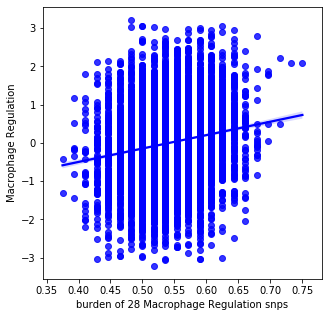

In [19]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="Macrophage.Regulation",data=raw_pheno,color="blue")
plt.xlabel("burden of 28 Macrophage Regulation snps")
plt.ylabel("Macrophage Regulation")
plt.savefig("../plots/burden.pdf")

In [41]:
raw_pheno=raw_pheno[~raw_pheno["Macrophage.Regulation"].isnull()]

In [42]:
ols = linear_model.LinearRegression()
X=raw_pheno["score"].values.reshape(-1, 1)
y=raw_pheno["Macrophage.Regulation"].values.reshape(-1, 1)
        
X = sm.add_constant(X)
        
model=sm.OLS(y,X)
results=model.fit()

print(results.pvalues[1],results.params[1])

3.115723407410179e-50 3.509041434727349
